# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report


In [2]:
X, y = make_classification(n_features=2, n_classes=2, n_clusters_per_class=1, n_samples=200, n_informative=2, 
                           n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)

log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_knn = knn.predict(X_test)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
svc_metrics = evaluate_model(y_test, y_pred_svc)
knn_metrics = evaluate_model(y_test, y_pred_knn)


In [3]:
def plot_decision_boundary(X, y, model, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('#2b2d42', '#d90429')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('#2b2d42', '#d90429')))
    ax.set_title(title)

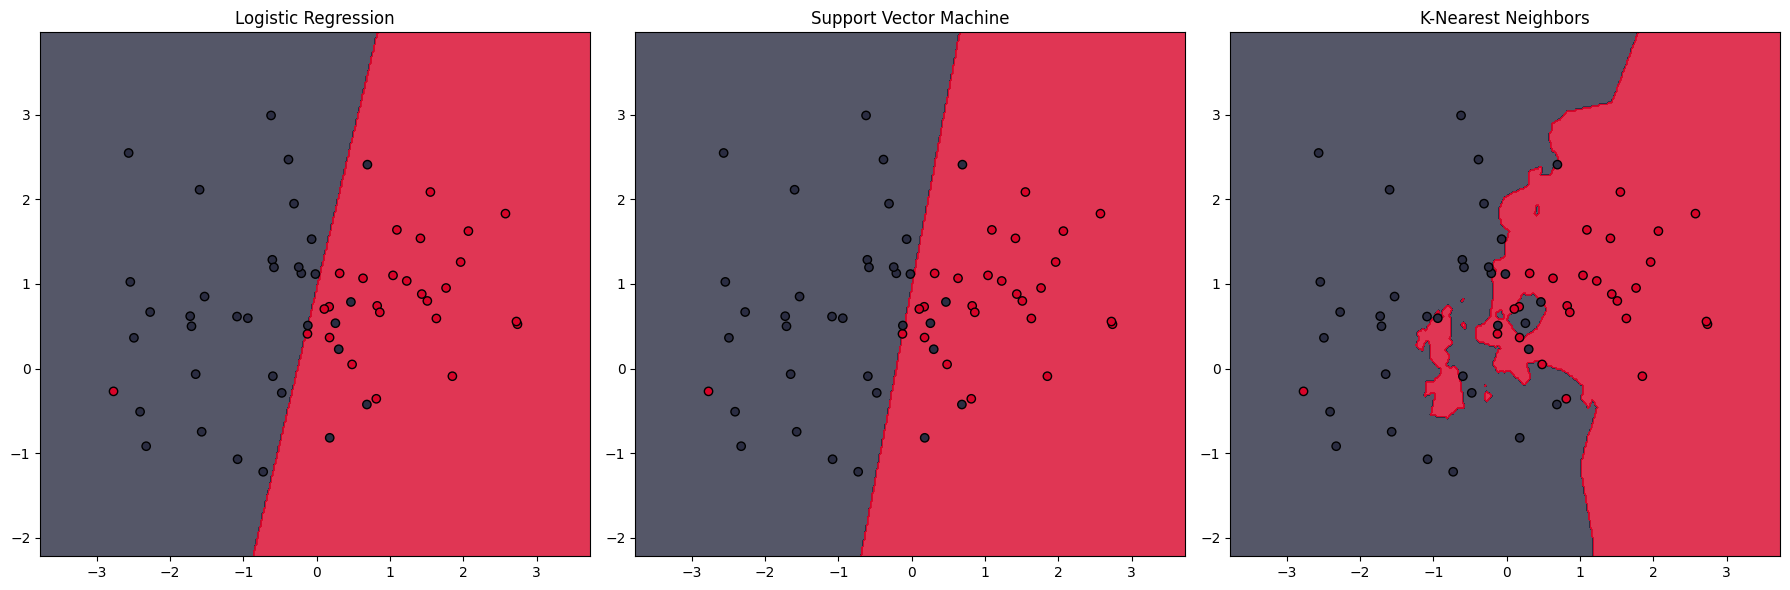

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundary(X_test, y_test, log_reg, "Logistic Regression", axes[0])
plot_decision_boundary(X_test, y_test, svc, "Support Vector Machine", axes[1])
plot_decision_boundary(X_test, y_test, knn, "K-Nearest Neighbors", axes[2])

plt.tight_layout()
plt.show()


In [5]:

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("SVM Report:\n", classification_report(y_test, y_pred_svc))
print("KNN Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60

SVM Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60

KNN Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.85      0.85      0.85        26

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       

**Аналіз отриманих результатів**:

`Logistic Regression:`

1. Точність для класу 0 (precision): 0.96 — це означає, що 96% передбачень класу 0 були правильними.
2. Чутливість для класу 0 (recall): 0.79 — це означає, що модель виявила 79% всіх справжніх випадків класу 0.
3. Точність для класу 1: 0.78 — тобто 78% передбачень для класу 1 були правильними.
4. Чутливість для класу 1: 0.96 — модель виявила 96% всіх справжніх випадків класу 1.
5. Загальна точність (accuracy): 0.87 — модель правильно класифікувала 87% всіх прикладів.

`SVM (Support Vector Machine):`

1. Точність для класу 0: 0.93 — це означає, що 93% передбачень класу 0 були правильними.
2. Чутливість для класу 0: 0.82 — модель виявила 82% всіх справжніх випадків класу 0.
3. Точність для класу 1: 0.80 — 80% передбачень для класу 1 були правильними.
4. Чутливість для класу 1: 0.92 — модель виявила 92% всіх випадків класу 1.
5. Загальна точність: 0.87 — так само, як і у Logistic Regression.

`K-Nearest Neighbors (KNN):`

1. Точність для класу 0: 0.88 — 88% передбачень для класу 0 були правильними.
2. Чутливість для класу 0: 0.88 — модель виявила 88% всіх справжніх випадків класу 0.
3. Точність для класу 1: 0.85 — 85% передбачень для класу 1 були правильними.
4. Чутливість для класу 1: 0.85 — модель виявила 85% всіх випадків класу 1.
5. Загальна точність: 0.87 — така ж, як у інших моделей.


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
X, y = make_classification(n_features=2, n_classes=3, n_clusters_per_class=1, n_samples=300, 
                           n_informative=2, n_redundant=0, random_state=42, class_sep=1.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(multi_class='ovr')
svc = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("SVM Report:\n", classification_report(y_test, y_pred_svc))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.95      0.97      0.96        38
           2       1.00      0.88      0.94        25

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90

SVM Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.97      0.99        38
           2       1.00      0.96      0.98        25

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

Random Forest Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.95      0.97        38
          

In [8]:
def plot_decision_boundary(X, y, model, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('#2b2d42', '#d90429', '#EDF2F4')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('#2b2d42', '#d90429', '#EDF2F4')))
    ax.set_title(title)

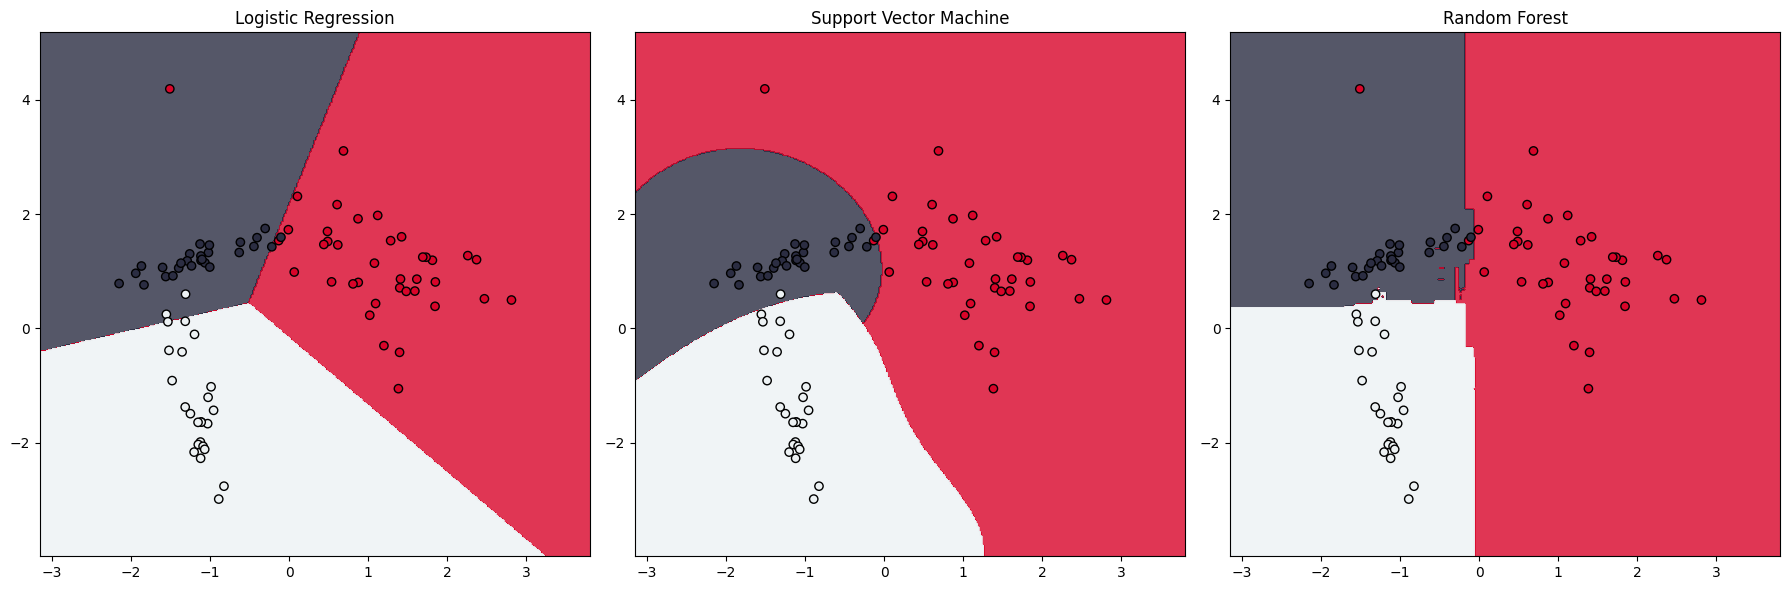

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundary(X_test, y_test, log_reg, "Logistic Regression", axes[0])
plot_decision_boundary(X_test, y_test, svc, "Support Vector Machine", axes[1])
plot_decision_boundary(X_test, y_test, rf, "Random Forest", axes[2])

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1. Перекриття класів означає, що деякі точки з різних класів дуже близько одна до одної, через що моделі можуть робити помилки. Це ускладнює завдання класифікації.

2. SVM (Support Vector Machine) використовує складні межі для розділення класів, тому може краще справлятися з даними, де немає чітких ліній між класами.

3. Випадковий ліс (Random Forest) працює за рахунок багатьох дерев рішень, тому він може ефективніше розпізнавати точки, які важко віднести до конкретного класу. Це робить його хорошим вибором для даних з перекриттям.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [10]:
from sklearn.datasets import make_circles

In [11]:
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
svc = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("SVM Report:\n", classification_report(y_test, y_pred_svc))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48        75
           1       0.48      0.48      0.48        75

    accuracy                           0.48       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.48      0.48      0.48       150

SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted 

In [12]:
def plot_decision_boundary(X, y, model, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('#2b2d42', '#d90429')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('#2b2d42', '#d90429')))
    ax.set_title(title)

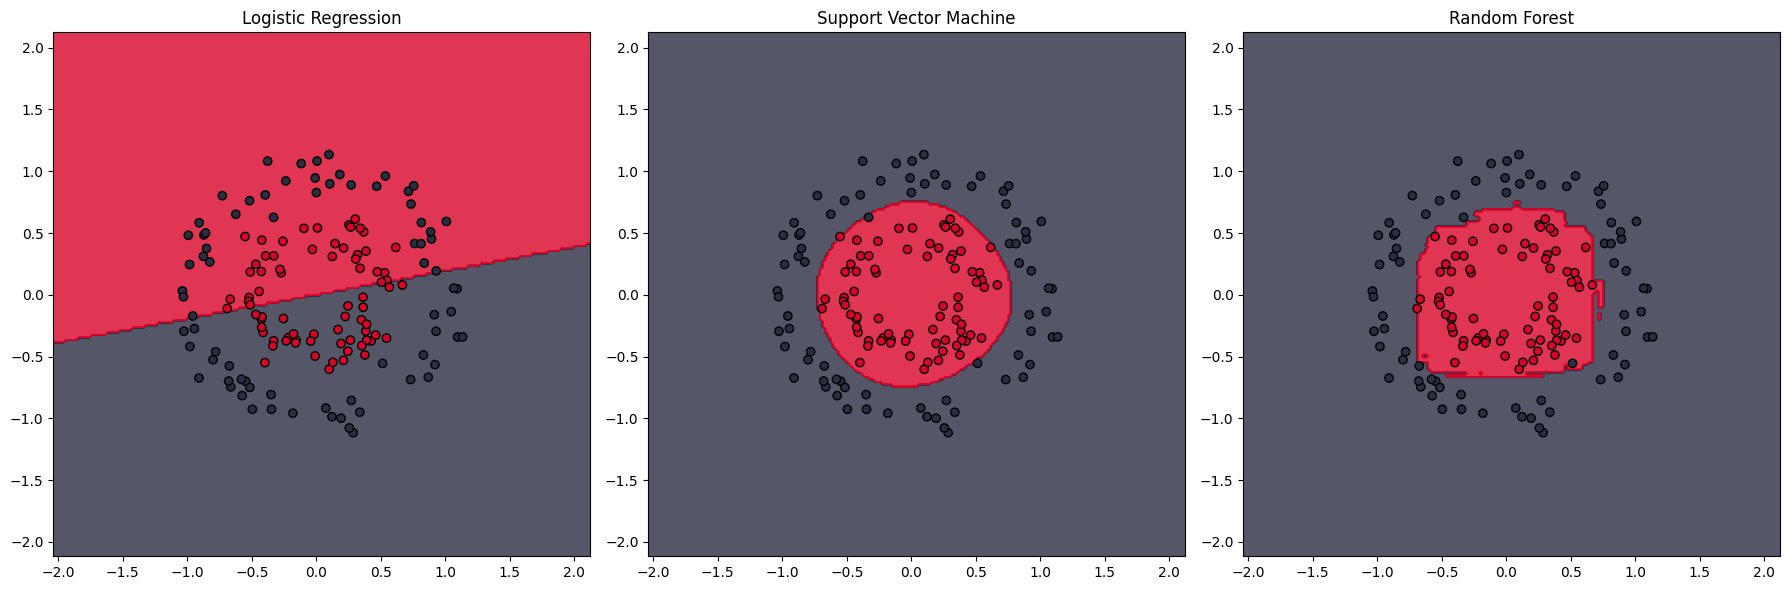

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundary(X_test, y_test, log_reg, "Logistic Regression", axes[0])
plot_decision_boundary(X_test, y_test, svc, "Support Vector Machine", axes[1])
plot_decision_boundary(X_test, y_test, rf, "Random Forest", axes[2])

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

`Logistic Regression:`

1. Точність: 48% для обох класів.
2. Висновок: Логістична регресія не справляється з складними даними, такими як кілька торів. Її лінійний підхід не дозволяє добре розділити такі дані, тому точність дуже низька.

`SVM з RBF ядром:`

1. Точність: 99% для обох класів.
2. Висновок: SVM з RBF ядром чудово справляється зі складними даними. Воно може створювати складні межі між класами, що дозволяє йому правильно їх розділити, навіть коли дані мають складну структуру.

`Random Forest:`

1. Точність: 98% для обох класів.
3. Випадковий ліс також добре працює з такими даними, оскільки використовує кілька дерев рішень, які можуть ефективно справлятися зі складними межами між класами. Його точність трохи нижча, ніж у SVM.

**Висновки:**

Логістична регресія не підходить для складних даних, оскільки вона працює тільки з лінійними межами між класами.

SVM з RBF ядром краще справляється з складними даними, оскільки може створювати нелінійні межі.

Випадковий ліс також добре працює з такими даними, але його точність трохи нижча, ніж у SVM.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [15]:
df = pd.read_csv('task4.csv') 
X = df[['x', 'y']].values
y = df['class'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVM (RBF)': SVC(kernel='rbf', gamma='auto', C=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [16]:
def plot_decision_boundary(model, X, y, ax, title): 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#2b2d42', '#d90429']))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#2b2d42', '#d90429']))
    
    ax.set_title(title)


SVM (RBF) Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       150
           1       0.56      0.56      0.56       150

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       150
           1       0.94      0.99      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

KNN Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.9

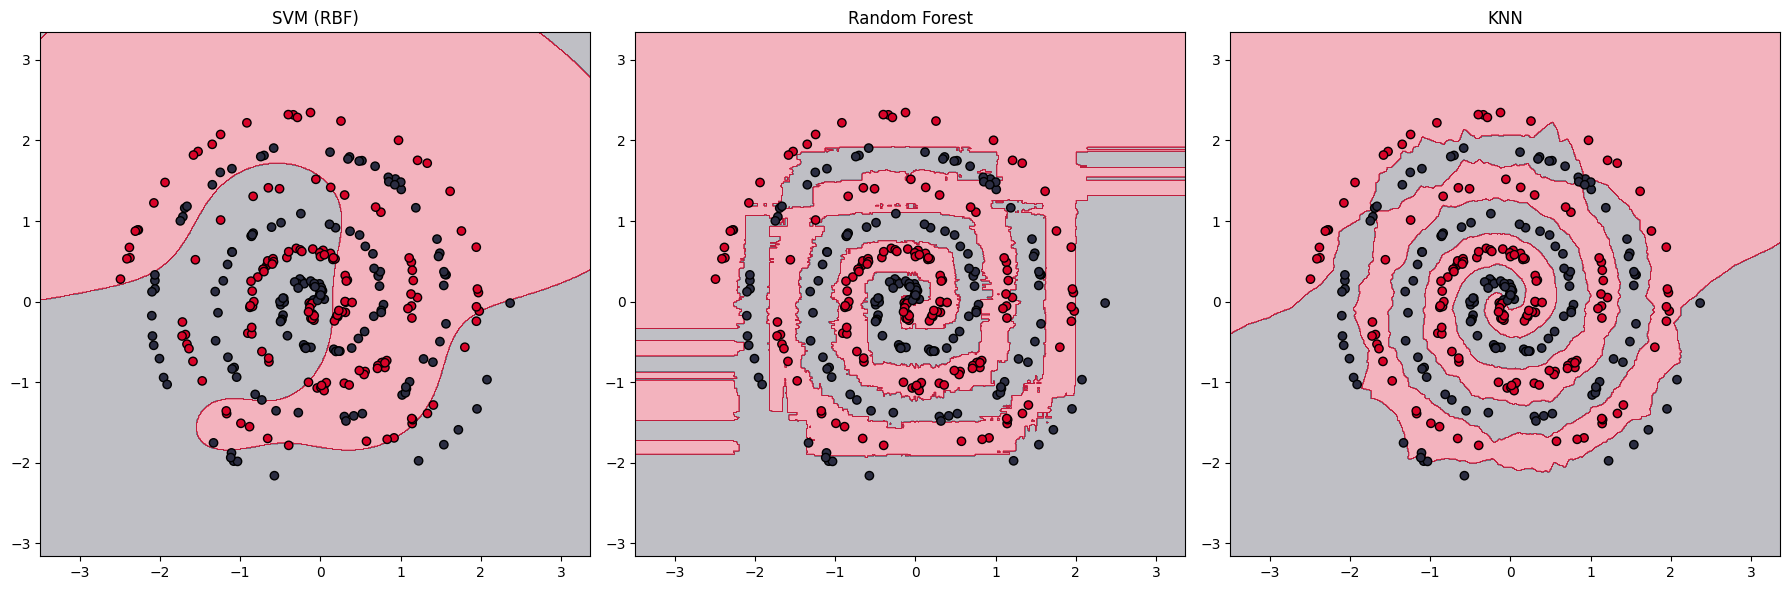

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Report:\n{classification_report(y_test, y_pred)}")
    
    ax = axes[i]
    plot_decision_boundary(model, X_test, y_test, ax, model_name)

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1. ``SVM (RBF):``

- точність (Precision): 0.56 для обох класів.
- відгук (Recall): 0.55 для класу 0 і 0.56 для класу 1.
- F1 Score: 0.56 для обох класів.
- точність моделі: 0.56.

висновок: SVM з ядром RBF має низькі показники точності та відгуку, що свідчить про слабке розрізнення класів у даних.

2. ``Random Forest:``

- точність: 0.99 для класу 0 і 0.94 для класу 1.
- відгук: 0.94 для класу 0 і 0.99 для класу 1.
- F1 Score: 0.97 для обох класів.
- точність моделі: 0.97.

висновок: Random Forest має високі показники точності та відгуку для обох класів, демонструючи відмінну загальну продуктивність.

3. ``KNN:``

- точність: 1.00 для класу 0 і 0.99 для класу 1.
- відгук: 0.99 для класу 0 і 1.00 для класу 1.
- F1 Score: 0.99 для обох класів.
- точність моделі: 0.99.

висновок: KNN також має дуже високі показники точності, відгуку і F1 Score для обох класів, що свідчить про відмінну продуктивність моделі.